In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install fastai --upgrade
!pip install -Uqq fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.2/232.2 kB 3.3 MB/s eta 0:00:00 0:00:01


In [ ]:
import fastbook
fastbook.setup_book()

In [ ]:
from fastai.vision.all import *
from fastbook import *

In [ ]:
matplotlib.rc('image', cmap='Greys')
path = untar_data(URLs.MNIST_SAMPLE)


In [ ]:
Path.BASE_PATH = path
path.ls()

In [ ]:
(path/'train').ls()
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [ ]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [ ]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

In [ ]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(seven_tensors), len(three_tensors)

In [ ]:
show_image(three_tensors[1])

In [ ]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

In [ ]:
mean_3 = stacked_threes.mean(0)
mean_7 = stacked_sevens.mean(0)
show_image(mean_3)
show_image(mean_7)

In [ ]:
a_3 = stacked_threes[1]
show_image(a_3)

In [ ]:
dist_3_abs = (a_3 - mean_3).abs().mean()
dist_3_sqr = ((a_3 - mean_3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

In [ ]:
dist_7_abs = (a_3 - mean_7).abs().mean()
dist_7_sqr = ((a_3 - mean_7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

In [ ]:
F.l1_loss(a_3.float(), mean_7), F.mse_loss(a_3.float(), mean_7).sqrt()

In [ ]:
data = [[1,2,3],[4,5,6]]

arr = array(data)
tns = tensor(data)
tns + 1
# tns
tns * 1.5

In [ ]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape


In [ ]:
def mnist_distance(a,b): return (a-b).abs().mean((-1, -2))
mnist_distance(a_3, mean_3)

In [28]:
print(valid_3_tens.shape)
print(mean_3.shape)

torch.Size([1010, 28, 28])
torch.Size([28, 28])


In [29]:
a = valid_3_tens
b = mean_3

(a-b).shape

torch.Size([1010, 28, 28])

In [22]:
valid_3_dist = mnist_distance(valid_3_tens, mean_3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1270, 0.1632, 0.1676,  ..., 0.1228, 0.1210, 0.1287]),
 torch.Size([1010]))

In [25]:
(valid_3_tens - mean_3).shape

torch.Size([1010, 28, 28])

In [39]:
def is_3(x): return mnist_distance(x, mean_3) < mnist_distance(x, mean_7)

In [42]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()
accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2


(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [43]:
def f(x): return x**2

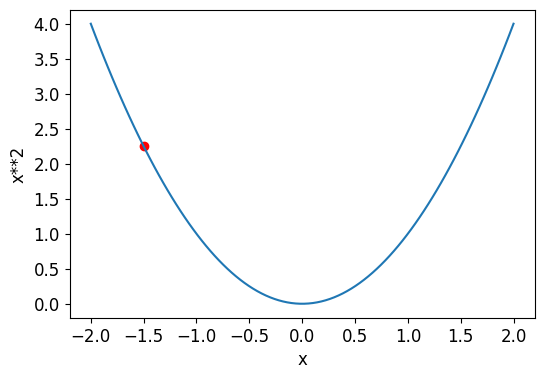

In [45]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red')

In [53]:
xt = tensor(3.).requires_grad_()
yt = f(xt)
yt.backward()
xt.grad

tensor(6.)

In [54]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [56]:
def f(x): return (x**2).sum()
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [57]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

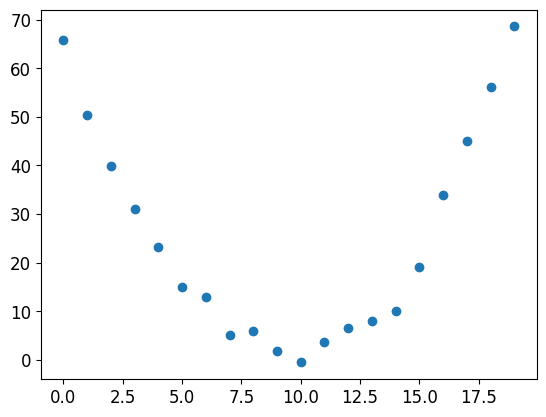

In [64]:
time = torch.arange(0,20).float()
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed)

In [65]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [66]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [67]:
params = torch.randn(3).requires_grad_()
orig_params = params.clone()

In [69]:
preds = f(time, params)
preds

tensor([  -0.5359,   -2.5118,   -7.0561,  -14.1689,  -23.8500,  -36.0996,  -50.9176,  -68.3041,  -88.2589, -110.7822, -135.8739, -163.5340, -193.7626, -226.5595, -261.9249, -299.8587, -340.3610,
        -383.4316, -429.0707, -477.2782], grad_fn=<AddBackward0>)

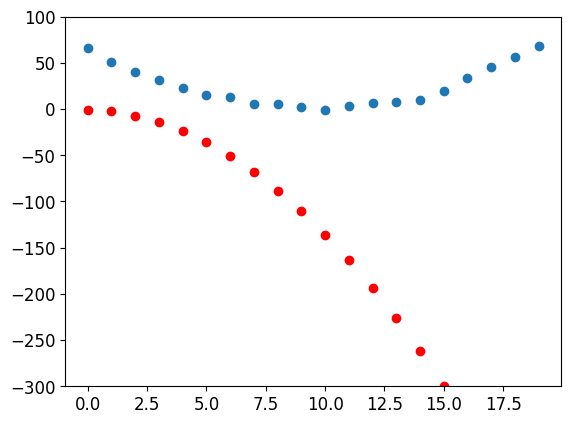

In [72]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

show_preds(preds)

In [79]:
loss = mse(preds, speed)
loss.backward()


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [81]:
params.grad * 1e-5
params

tensor([-1.2842, -0.6917, -0.5359], requires_grad=True)

In [82]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [83]:
preds = f(time,params)
mse(preds, speed)

tensor(12041.6523, grad_fn=<MeanBackward0>)

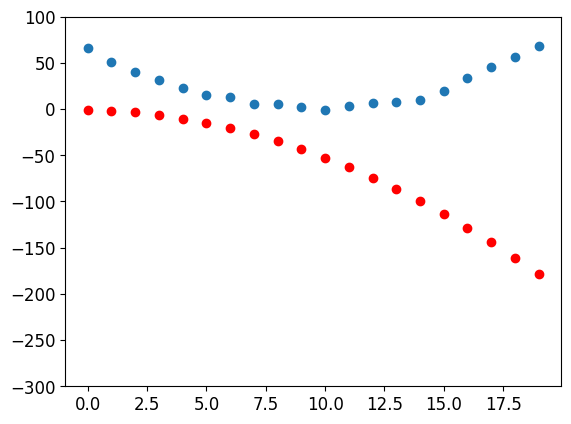

In [84]:
show_preds(preds)


In [85]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [86]:
for i in range(10): apply_step(params)

12041.65234375
2763.820068359375
1008.1676635742188
675.9413452148438
613.0707397460938
601.1704711914062
598.9152221679688
598.4852294921875
598.4005737304688
598.3812255859375


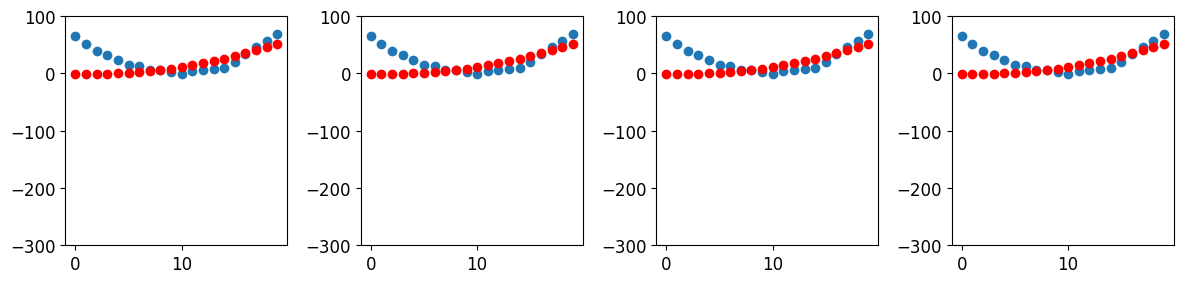

In [90]:
params = orig_params.detach().requires_grad_()
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [92]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [95]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [99]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [104]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28,1))
bias = init_params(1)


In [111]:
(train_x[0]*weights.T).sum() + bias
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds


tensor([[11.1453],
        [-5.4198],
        [ 2.9273],
        ...,
        [ 6.0322],
        [ 3.4573],
        [ 4.9895]], grad_fn=<AddBackward0>)

In [112]:
corrects = (preds>0.0).float() == train_y
corrects
corrects.float().mean().item()


0.48604387044906616

In [113]:
with torch.no_grad(): weights[0] *= 1.0001

preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.48604387044906616

In [115]:
trgts  = tensor([1,0,1])
prds   = tensor([0.9, 0.4, 0.2])


def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

torch.where(trgts==1, 1-prds, prds)


tensor([0.1000, 0.4000, 0.8000])

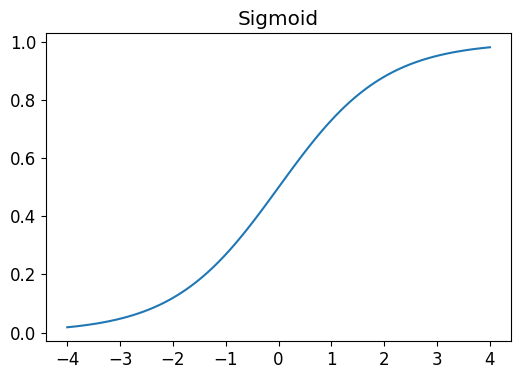

In [116]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)


In [117]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [119]:
weights = init_params((28*28,1))
bias = init_params(1)
dl = DataLoader(dset, batch_size=256)
valid_dl = DataLoader(valid_dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [121]:
batch = train_x[:4]
batch.shape
preds = linear1(batch)
preds

tensor([[-1.2468],
        [14.3639],
        [ 4.0537],
        [ 6.4404]], grad_fn=<AddBackward0>)

In [122]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.1988, grad_fn=<MeanBackward0>)

In [123]:
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0069), tensor([-0.0479]))

In [125]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()


calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0137), tensor([-0.0959]))

In [126]:

calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0206), tensor([-0.1438]))

In [127]:
weights.grad.zero_()
bias.grad.zero_();

In [128]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [130]:
(preds>0.0).float() == train_y[:4]
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

batch_accuracy(linear1(batch), train_y[:4])


tensor(0.7500)

In [132]:

def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

validate_epoch(linear1)


0.5947

In [133]:

lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.6961

In [134]:

for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.8499 0.8948 0.9227 0.9334 0.9422 0.9486 0.9535 0.9574 0.9598 0.9618 0.9633 0.9657 0.9672 0.9681 0.9681 0.9681 0.9681 0.9701 0.9711 0.9711 

In [136]:
linear_model = nn.Linear(28*28,1)
w,b = linear_model.parameters()
w.shape,b.shape


(torch.Size([1, 784]), torch.Size([1]))

In [138]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [139]:
opt = BasicOptim(linear_model.parameters(), lr)


In [140]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [141]:

def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [142]:
train_model(linear_model, 20)

0.4932 0.7153 0.8613 0.9184 0.936 0.9506 0.9575 0.9628 0.9662 0.9672 0.9697 0.9711 0.9741 0.975 0.976 0.977 0.9775 0.9785 0.9785 0.9789 

In [143]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)


0.4932 0.7578 0.8608 0.9184 0.9345 0.9502 0.957 0.9638 0.9658 0.9677 0.9711 0.9711 0.9745 0.975 0.976 0.977 0.9775 0.978 0.9785 0.9789 

In [145]:
dls = DataLoaders(dl, valid_dl)

learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(10, lr=lr)


epoch,train_loss,valid_loss,batch_accuracy,time
0,0.637089,0.503415,0.495584,00:00
1,0.485189,0.210745,0.813543,00:00
2,0.179581,0.174388,0.845437,00:00
3,0.079528,0.105686,0.912659,00:00
4,0.042665,0.077588,0.932777,00:00
5,0.028244,0.062288,0.946025,00:00
6,0.022293,0.052702,0.955348,00:00
7,0.019635,0.046304,0.962218,00:00
8,0.018277,0.041804,0.965653,00:00
9,0.017455,0.038493,0.967125,00:00


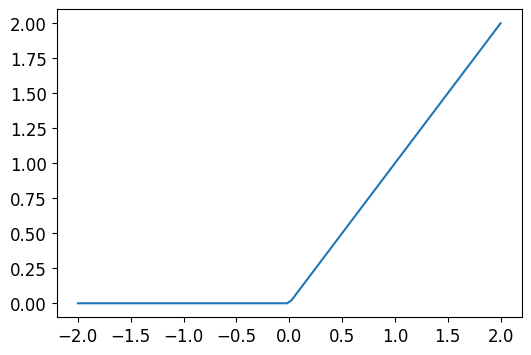

In [146]:
# def simple_net(xb): 
#     res = xb@w1 + b1
#     res = res.max(tensor(0.0))
#     res = res@w2 + b2
#     return res


# w1 = init_params((28*28,30))
# b1 = init_params(30)
# w2 = init_params((30,1))
# b2 = init_params(1)

plot_function(F.relu)


In [147]:

simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.293710,0.406278,0.506379,00:00
1,0.139053,0.217045,0.820903,00:00
2,0.077501,0.109985,0.921982,00:00
3,0.051271,0.074973,0.945535,00:00
4,0.039101,0.059042,0.958292,00:00
5,0.032879,0.050080,0.964671,00:00
6,0.029298,0.044390,0.966143,00:00
7,0.026968,0.040472,0.968597,00:00
8,0.025287,0.037615,0.969087,00:00
9,0.023986,0.035426,0.971541,00:00


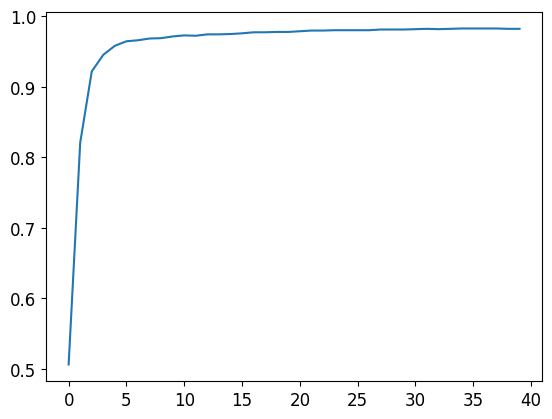

In [148]:
plt.plot(L(learn.recorder.values).itemgot(2));


In [149]:
learn.recorder.values[-1][2]


0.98233562707901

In [150]:
dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.130921,0.038007,0.994603,01:54
